# Balaji Restaurant Food Sales Analysis

Hello, I'm Ademola Abraham, a Data Analyst. Today, I will be working on a report that focuses on analyzing **Balaji Restaurant Food sales data** to identify important trends, insights, and opportunities for enhancing business performance. I will use Python for data analysis and visualization to share findings related to different types of Food, their quantity, pricing, and monthly sales trends.

## **Objective of the Report:**  
The objective of this report is to analyze the sales data of Balaji Restaurant to uncover key trends, customer preferences, and sales drivers. This analysis aims to provide actionable insights to enhance operational efficiency, optimize product offerings, and boost overall revenue.  

## **Source of the Dataset:**  
The dataset for this analysis comes from [Kaggle Datasets](https://www.kaggle.com/datasets/rajatsurana979/fast-food-sales-report).

## **Dataset Description:**  
The dataset contains information on sales transactions, including details such as order ID, date, item names, item types (e.g., beverages and fast food), prices, quantities sold, transaction amounts, transaction types (cash or online), customer gender, and time of sale. The data spans a significant period, allowing for a comprehensive analysis of sales performance and customer behavior.

### Importing Python Libaries needed for Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Data Cleaning and Preparation

In [2]:
raw_data = pd.read_csv(r'Balaji Fast Food Sales.csv')
raw_data

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


In [3]:
data = raw_data.copy()
data.head(2)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon


In [4]:
data.sort_values('date', inplace=True)
data.reset_index(drop = True, inplace=True)
data

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,545,01-01-2023,Sandwich,Fastfood,60,13,780,Online,Mrs.,Midnight
1,903,01-01-2023,Aalopuri,Fastfood,20,15,300,Online,Mr.,Night
2,407,01-02-2023,Sugarcane juice,Beverages,25,2,50,Cash,Mr.,Evening
3,755,01-02-2023,Aalopuri,Fastfood,20,12,240,Cash,Mrs.,Night
4,210,01-02-2023,Sugarcane juice,Beverages,25,15,375,NaN,Mr.,Night
...,...,...,...,...,...,...,...,...,...,...
995,667,9/28/2022,Vadapav,Fastfood,20,3,60,Cash,Mrs.,Evening
996,470,9/29/2022,Vadapav,Fastfood,20,8,160,Cash,Mrs.,Morning
997,213,9/29/2022,Vadapav,Fastfood,20,3,60,NaN,Mrs.,Midnight
998,439,9/30/2022,Frankie,Fastfood,50,13,650,Online,Mr.,Afternoon


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [7]:
r_values = np.random.choice(['online', 'cash'])
data.loc[data['transaction_type'].isnull(), ['transaction_type']] = r_values

In [8]:
data.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [9]:
data.item_name.unique()

array(['Sandwich', 'Aalopuri', 'Sugarcane juice', 'Cold coffee',
       'Vadapav', 'Frankie', 'Panipuri'], dtype=object)

In [10]:
data.item_type.unique()

array(['Fastfood', 'Beverages'], dtype=object)

In [11]:
data.item_price.unique()

array([60, 20, 25, 40, 50], dtype=int64)

In [12]:
data.quantity.unique()

array([13, 15,  2, 12, 10,  8, 11,  3,  1,  6,  7,  9, 14,  5,  4],
      dtype=int64)

In [13]:
data.transaction_amount.unique()

array([780, 300,  50, 240, 375, 600, 320, 160, 275, 650, 260,  60, 250,
       900, 660, 500, 750,  20, 150, 400, 720, 280, 140, 180, 450, 120,
       200, 840, 100,  25, 480, 350, 225, 440, 175, 220, 125,  80, 420,
       540, 325, 560, 700,  40, 360, 520,  75, 550], dtype=int64)

In [14]:
data.transaction_type.unique()

array(['Online', 'Cash', 'cash'], dtype=object)

In [15]:
data.received_by.unique()

array(['Mrs.', 'Mr.'], dtype=object)

In [16]:
data.rename(columns = {'received_by':'gender'}, inplace=True)
data.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'gender', 'time_of_sale'],
      dtype='object')

In [17]:
data['gender'] = data['gender'].map({'Mrs.':'Female', 'Mr.':'Male'})
data['transaction_type'] = data['transaction_type'].replace({'online':'Online', 'cash':'Cash'})

data.sample(5)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,gender,time_of_sale
552,508,12-10-2022,Sandwich,Fastfood,60,1,60,Cash,Male,Night
47,733,02-03-2023,Frankie,Fastfood,50,10,500,Cash,Male,Evening
307,343,1/18/2023,Sugarcane juice,Beverages,25,5,125,Cash,Male,Afternoon
44,15,02-03-2023,Aalopuri,Fastfood,20,3,60,Cash,Female,Evening
45,644,02-03-2023,Panipuri,Fastfood,20,5,100,Online,Female,Evening


In [18]:
data.dtypes

order_id               int64
date                  object
item_name             object
item_type             object
item_price             int64
quantity               int64
transaction_amount     int64
transaction_type      object
gender                object
time_of_sale          object
dtype: object

In [19]:
datatype_changes = {'item_name':'string', 'item_type':'category', 'transaction_type':'category', 'gender':'category', 'time_of_sale':'category'}
data['date'] = pd.to_datetime(data['date'])

data = data.astype(datatype_changes)
data.dtypes

order_id                       int64
date                  datetime64[ns]
item_name                     string
item_type                   category
item_price                     int64
quantity                       int64
transaction_amount             int64
transaction_type            category
gender                      category
time_of_sale                category
dtype: object

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   string        
 3   item_type           1000 non-null   category      
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    1000 non-null   category      
 8   gender              1000 non-null   category      
 9   time_of_sale        1000 non-null   category      
dtypes: category(4), datetime64[ns](1), int64(4), string(1)
memory usage: 51.5 KB


In [21]:
data.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


# Exploratory Analysis and Visualization

In [22]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14,5)
sns.set_style('darkgrid')

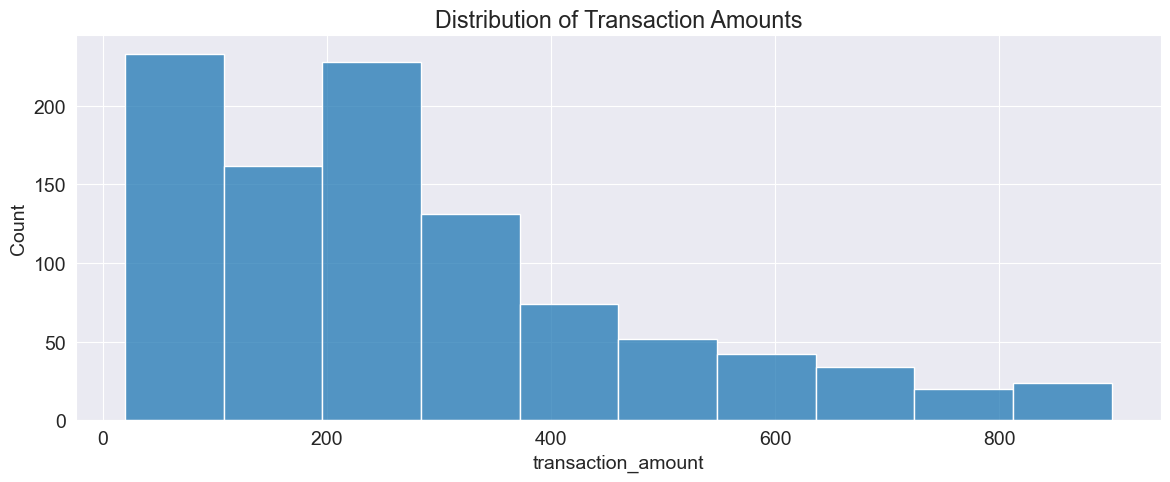

In [23]:
sns.histplot(data=data, x='transaction_amount', bins=10)
plt.title('Distribution of Transaction Amounts');

### Observation:
The histogram shows the **Distribution of transaction amounts** in the dataset. Key observations include:
1. The majority of transaction amounts fall within the **0-300 range** (over 400 counts in this range).
2. As transaction amounts increase, the frequency of transactions decreases, indicating fewer high-value transactions (500+ range has significantly lower counts).
3. The distribution is **right-skewed**, with a heavy concentration of low-value transactions and a gradual decline toward higher amounts.

### Insights:
1. **Low-Value Dominance**: The business mostly deals in low-value transactions, which might indicate a focus on affordable or quick-serve items.
2. **Target Audience**: Customers might be price-sensitive, favoring products in the lower price range.
3. **Upselling Opportunity**: There’s a scope to increase average transaction amounts by promoting combo offers or high-value items.
4. **Customer Behavior**: Frequent small transactions might reflect a steady inflow of regular customers rather than occasional big spenders.


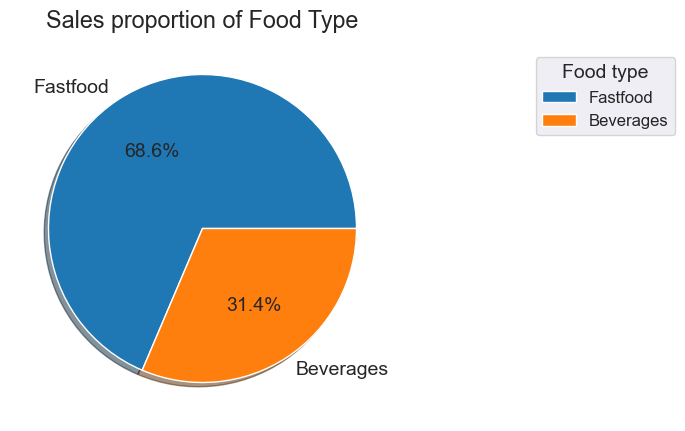

In [24]:
plt.pie(x=data['item_type'].value_counts(), labels=data['item_type'].unique(), shadow=True, autopct ='%.1f%%')
plt.legend(title='Food type', loc = 4,fontsize  = 12, bbox_to_anchor =(1.75, 0.72), ncol = 1)
plt.title('Sales proportion of Food Type');

### Observation:
The pie chart displays the percentage of sales based on food types, **Fastfood** and **Beverages**.  
- **Fastfood** accounts for the majority, with **68.6% of the total sales**.
- **Beverages** make up the remaining **31.4%** of sales.

### Insights:
1. **Fastfood Dominates**: The restaurant generates most of its sales from fast food items, indicating it is the primary revenue driver.
2. **Beverage Upselling Opportunity**: Beverages contribute to a smaller share. There’s potential to boost beverage sales through bundling offers with fast food or promoting standalone drinks.
3. **Customer Preference**: Customers seem to prefer fast food, so maintaining variety and quality in this category is critical for sustaining revenue.


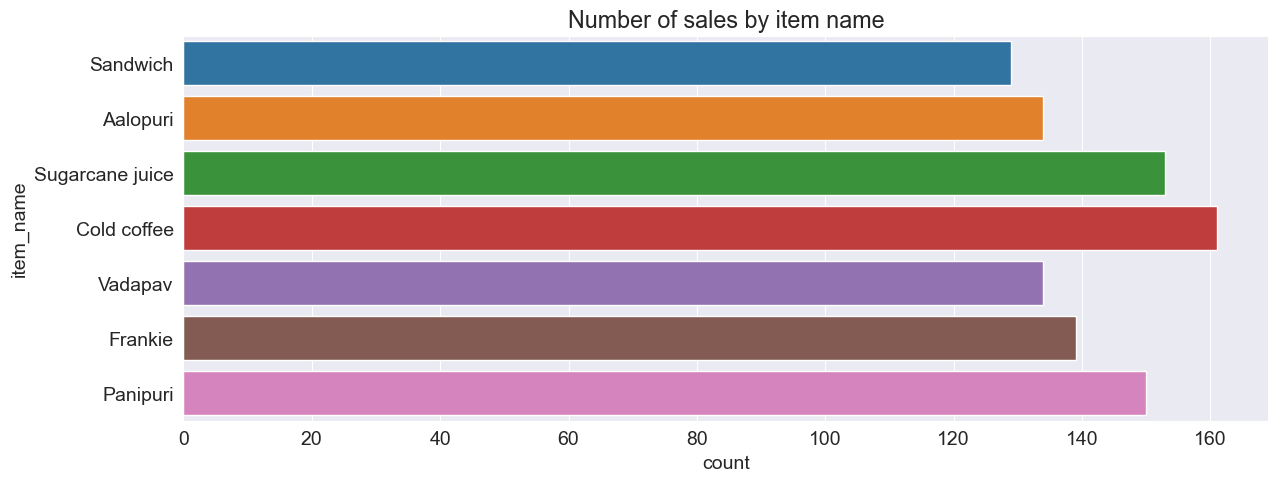

In [25]:
sns.countplot(data=data, y='item_name')
plt.title('Number of sales by item name');

From the bar chart, we can see that:

1. Top-Selling Item:

>Cold Coffee has the highest number of sales, indicating its popularity among customers.
Consistently.

>Sugarcane Juice and Sandwiches also exhibit a strong number of sales, suggesting they are customer favorites.

>Other food items like Pani Puri, Aaloo Puri, Frankie, and Vada Pav have similar sales numbers, indicating a well-rounded menu without extreme outliers.

In summary, customers prefer Beverages like Cold Coffee and Sugarcane Juice are as popular as fast food items, showing that both categories contribute significantly to sales.

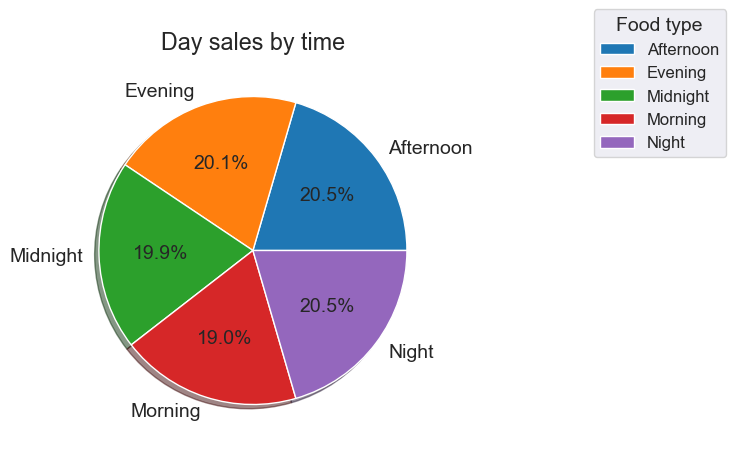

In [26]:
plt.pie(x=data['time_of_sale'].value_counts(sort=False), labels=data['time_of_sale'].value_counts(sort=False).index, shadow=True, autopct ='%.1f%%')
plt.legend(title='Food type', loc = 4,fontsize  = 12, bbox_to_anchor =(1.75, 0.72), ncol = 1)
plt.title('Day sales by time');

The Sales are distributed almost evenly throughout the day, with Afternoon and Night leading slightly at 20.5%.
>Insight: The business is not reliant on a specific time slot, indicating consistent customer activity throughout the day.

Midnight sales remain competitive at 19.9%, showcasing potential for late-night customer interest.
>Insight: Consider promoting late-night offers or discounts to further boost sales during midnight hours.

Morning and Evening sales hover around 19-20%, indicating steady demand in these slots as well.
>Insight: Ensure staff scheduling and inventory are balanced to cater to demand evenly across all time periods.

Overall: The even distribution highlights a well-rounded operation catering to customers at all times of the day.

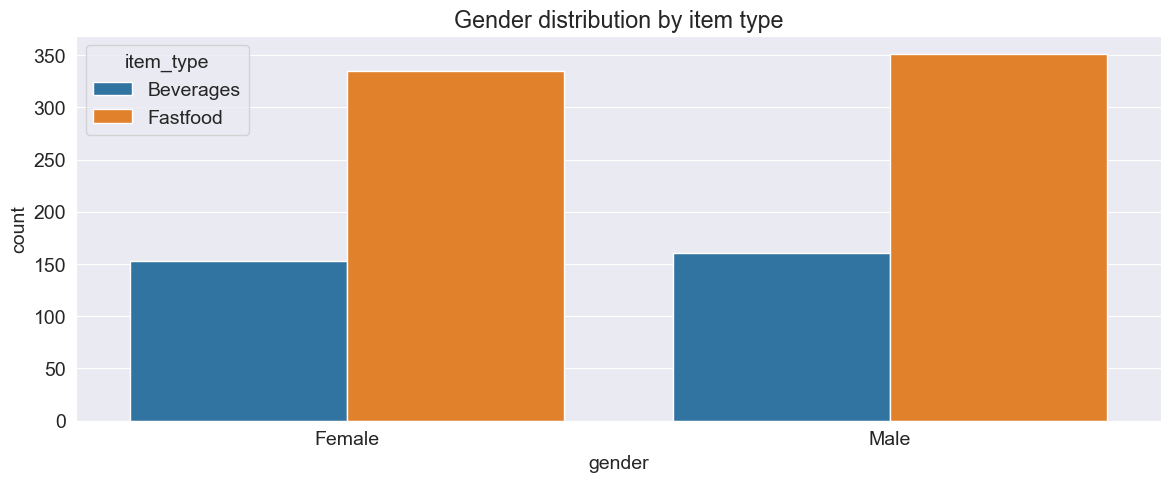

In [27]:
sns.countplot(data=data, x='gender', hue='item_type')
plt.title('Gender distribution by item type');

**Observation:** 
     Females tend to purchase more fast food than beverages.
     Males exhibit a similar pattern, purchasing more fast food than beverages.
> **Insight:** 
     Fast food is the most preferred item type for both genders.
     Marketing campaigns could focus on promoting fast food as the main item, while beverages could be cross-sold as complementary.

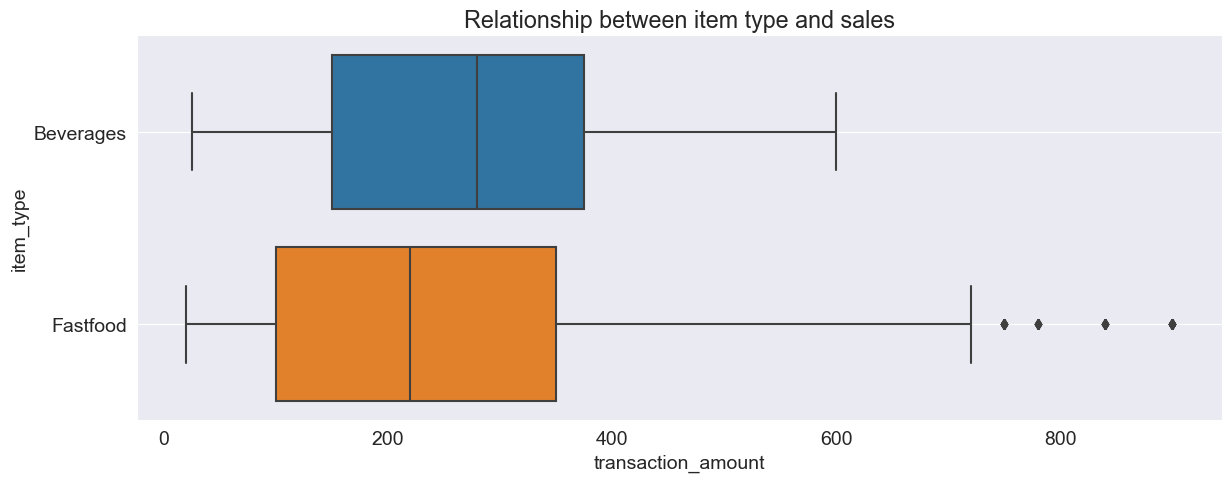

In [28]:
sns.boxplot(data=data, y='item_type', x='transaction_amount')
plt.title('Relationship between item type and sales')
plt.grid();

**Observation:** 
     Beverages tend to have a slightly higher transaction amount variability compared to fast food.
     Fast food transactions generally cluster around lower amounts.
     There are some outliers in fast food transactions, indicating occasional high-value purchases.
> **Insight:** 
      Beverages might have premium pricing options contributing to higher transaction amounts.
      Fast food sales are consistent, making it a stable revenue stream, but beverages could be leveraged to drive high-ticket sales.

In [29]:
data['year_month'] = data['date'].dt.to_period('M').astype(str)
data.sample(3)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,gender,time_of_sale,year_month
731,310,2022-04-25,Vadapav,Fastfood,20,4,80,Cash,Male,Afternoon,2022-04
491,81,2022-11-19,Frankie,Fastfood,50,12,600,Online,Female,Night,2022-11
298,975,2023-01-15,Aalopuri,Fastfood,20,1,20,Cash,Male,Midnight,2023-01


In [30]:
a = data['year_month'].value_counts(sort=False)
a

2023-01     90
2023-02     83
2023-03     81
2022-04     66
2022-05    100
2022-06     68
2022-07     79
2022-08     90
2022-09     73
2022-10     98
2022-11     82
2022-12     90
Name: year_month, dtype: int64

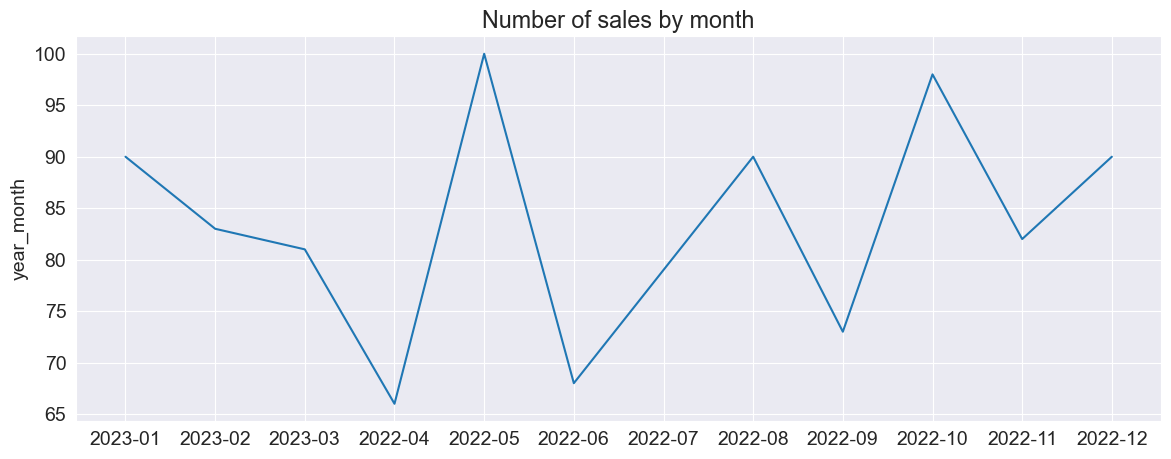

In [31]:
sns.lineplot(data=a, x=a.index, y=a)
plt.title('Number of sales by month');

**Observation:** 
     Sales exhibit fluctuation over months with peaks and troughs.
     There is a noticeable increase in sales during certain months (e.g., April and later months like November-December).
> **Insight:** 
   Sales spikes could be tied to seasonal events, holidays, or promotional campaigns.
   Business strategies should focus on replicating successful campaigns during peak months and addressing dips with targeted marketing.


In [32]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
download_plotlyjs

<function plotly.offline.offline.download_plotlyjs(download_url)>

In [33]:
b = data.groupby('year_month')[['transaction_amount']].sum().reset_index()

x = np.array(b.year_month)
y = np.array(b.transaction_amount)

trace = go.Scatter(x=x, y=y, mode='lines+markers')

In [34]:
fig = go.Figure(data=[trace])

In [35]:
fig.update_layout(title_text='Interactive Chart: Total revenue generated by Month', title_x=0.5, xaxis_title='Month', yaxis_title='Total Revenue')
fig.show()

# for the chart to display 👇🏽👇🏾👇🏿
# MAKE SURE YOU HAVE AN ACTIVE INTERNET CONNECTION OR YOU'RE CONNECTED TO A WIFI WITH DATA AND ACTIVE NETWORK!

The revenue trend for Balaji Restaurant, as depicted in the interactive visualization, shows notable fluctuations across the months. A significant revenue peak occurred in **May 2022**, followed by a sharp decline in the subsequent months, reaching a low in **July 2022**. After this dip, the revenue gradually recovered, achieving another high in **January 2023**, likely driven by seasonal factors such as holidays or festivals.  

The analysis indicates potential **seasonal influences** or **special events** contributing to the spikes, while the dips suggest opportunities for strategic interventions. For instance, targeted promotions, discounts, or marketing campaigns could be implemented during slower months to balance out the revenue flow.  

In conclusion, while the business has experienced periods of strong growth, optimizing operations and planning around the identified patterns will help ensure consistent and sustainable revenue growth throughout the year.

# Questions and Answers

## 1. What is the most sold Food?

In [36]:
c = data['item_name'].value_counts()
c

Cold coffee        161
Sugarcane juice    153
Panipuri           150
Frankie            139
Aalopuri           134
Vadapav            134
Sandwich           129
Name: item_name, dtype: Int64

In [37]:
print('''
1. What is the most sold Food?
Answer: {}'''.format(c.index[0]))


1. What is the most sold Food?
Answer: Cold coffee


## 2. What is the average transaction amount for cash vs online payments for the year 2023?

In [38]:
d = data[data['year_month'].str.contains('2023')]
d

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,gender,time_of_sale,year_month
0,545,2023-01-01,Sandwich,Fastfood,60,13,780,Online,Female,Midnight,2023-01
1,903,2023-01-01,Aalopuri,Fastfood,20,15,300,Online,Male,Night,2023-01
2,407,2023-01-02,Sugarcane juice,Beverages,25,2,50,Cash,Male,Evening,2023-01
3,755,2023-01-02,Aalopuri,Fastfood,20,12,240,Cash,Female,Night,2023-01
4,210,2023-01-02,Sugarcane juice,Beverages,25,15,375,Cash,Male,Night,2023-01
...,...,...,...,...,...,...,...,...,...,...,...
700,432,2023-03-27,Panipuri,Fastfood,20,6,120,Online,Male,Afternoon,2023-03
701,590,2023-03-27,Panipuri,Fastfood,20,15,300,Online,Male,Midnight,2023-03
702,548,2023-03-29,Cold coffee,Beverages,40,14,560,Cash,Male,Afternoon,2023-03
703,97,2023-03-29,Cold coffee,Beverages,40,13,520,Online,Male,Evening,2023-03


In [39]:
e = d.groupby('transaction_type')['transaction_amount'].mean()
e.round(1)

transaction_type
Cash      324.3
Online    297.2
Name: transaction_amount, dtype: float64

In [40]:
print('''
2. What is the average transaction amount for cash vs online payments for the year 2023?
Answer: For cash, INR{} while online, INR{}'''.format(e[0].round(1), e[1].round(1)))


2. What is the average transaction amount for cash vs online payments for the year 2023?
Answer: For cash, INR324.3 while online, INR297.2


## 3. Which payment method is preferred by customers?

In [41]:
f = data['transaction_type'].value_counts()
f

Cash      583
Online    417
Name: transaction_type, dtype: int64

In [42]:
print('''
3. Which payment method is preferred by customers?
Answer: {} is the most common payment method preferred'''.format(f.index[0]))


3. Which payment method is preferred by customers?
Answer: Cash is the most common payment method preferred


## 4. What is the distribution of sales quantities across different item types?

In [43]:
g = data.groupby('item_type')['quantity'].sum()
g.reset_index()

,item_type,quantity
0,Beverages,2639
1,Fastfood,5523


## 5. What is the busiest time of the day for sales?

In [44]:
h = data['time_of_sale'].value_counts()
h.reset_index()

,index,time_of_sale
0,Afternoon,205
1,Night,205
2,Evening,201
3,Midnight,199
4,Morning,190


In [45]:
print('''
5. What is the busiest time of the day for sales?
Answer: {}'''.format(h.index[0]))


5. What is the busiest time of the day for sales?
Answer: Afternoon


## 6. Are there significant differences in average spending between male and female customers?

In [46]:
i = data.groupby('gender')['transaction_amount'].mean()
i.round(1).reset_index()

,gender,transaction_amount
0,Female,270.1
1,Male,280.2


In [47]:
print('''
6. Are there significant differences in average spending between male and female customers?
Answer: No, There isn't
        with the avearge spending for Males being INR{} while Females INR{}'''.format(i[1].round(1), i[0].round(1)))


6. Are there significant differences in average spending between male and female customers?
Answer: No, There isn't
        with the avearge spending for Males being INR280.2 while Females INR270.1


## 7. What is the total revenue generated over the dataset time period?

In [48]:
j = data.groupby('year_month')['transaction_amount'].sum()
j.reset_index()

,year_month,transaction_amount
0,2022-04,17670
1,2022-05,26570
2,2022-06,17335
3,2022-07,19490
4,2022-08,22305
5,2022-09,18640
6,2022-10,27205
7,2022-11,22900
8,2022-12,23460
9,2023-01,28670


# Conclusion

The Balaji Restaurant sales analysis highlights critical insights into customer preferences, sales trends, and revenue drivers. From understanding gender-based purchasing patterns to identifying top-performing items and seasonal trends, this data-driven approach provides actionable recommendations for optimizing operations and maximizing profitability. By leveraging these insights, Balaji Restaurant can make informed decisions to improve customer satisfaction, streamline inventory management, and enhance marketing efforts. This analysis serves as a foundation for continuous improvement and showcases the transformative potential of utilizing data analytics in the food and beverage industry.